<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오

- 럭키백 판매
- 구성품 : 생선(종류 7가지 랜덤)
- 7가지의 생선 각각의 뽑기 확률제공

k-최근접 알고르즘을 이용 => 회귀(확률출력)

ex) 샘플 10개
- 농어 3개 = 3/10 = 0.3   
- 빙어 5개 = 5/10 = 0.5
- 도미 2개 = 2/10 = 0.2

sklearn의 k-최근접 이웃 분리기도 이와 동일한 방식으로 확률 게산

# input data

- Species(생선종류)
- Weight(무게)
- Length(길이)
- Diagonal(대각선길이)
- Height(높이)
- Width(두께)

## .head()
- 제일 위쪽 데이터 5개를 보여주는 것

In [2]:
#pandas 이용
import pandas as pd

#웹에 위치한 파일을 가져옴
fish = pd.read_csv("http://bit.ly/fish_csv_data")

fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## .unique

- 유일한 값을 출력할 때 사용

In [3]:
# speices(생선의 종류)의 유일한 값 출력
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


- Bream : 도미
- Roach : 대구
- Whitefish : 잉어
- Parkki : 붕어
- Perch : 농어
- Pike : 가물치
- Smelt : 빙어

In [4]:
# 분석용 입력 리스트 생성
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


# target data

In [5]:
# fish[['Species']](X) : 2차원 배열x
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


# 데이터전처리

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape, test_input.shape)
#총데이터 : 159 = 119(훈련) + 40(테스트)
#특성 : 5개

(119, 5) (40, 5)


## .StandardScaler

- 표준점수화

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #스케일 조정(표준점수화)
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


# 훈련

## k-최근접 이웃 분류기

In [12]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

#scaled : 표준화한 데이터 이용
print("train : ", kn.score(train_scaled, train_target))
print("test  : ", kn.score(test_scaled, test_target))

train :  0.8907563025210085
test  :  0.85


### 다중분류
- 2개 이상의 클래스가 포함된 클래스
- ex) 7개의 어종 데이터

In [13]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [16]:
#처음 5개의 샘플을 target값으로 예측값
print(kn.predict(test_scaled[:5]))
print()
print(test_scaled[:5])

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']

[[-0.88741352 -0.91804565 -1.03098914 -0.90464451 -0.80762518]
 [-1.06924656 -1.50842035 -1.54345461 -1.58849582 -1.93803151]
 [-0.54401367  0.35641402  0.30663259 -0.8135697  -0.65388895]
 [-0.34698097 -0.23396068 -0.22320459 -0.11905019 -0.12233464]
 [-0.68475132 -0.51509149 -0.58801052 -0.8998784  -0.50124996]]


In [19]:
import numpy as np

# 번거로운  연산을 수행하여 쉽게 결과가 나옴
proba = kn.predict_proba(test_scaled[:5])

#round : 반올림, decimals: 소수점max
print(np.round(proba, decimals= 4)) #소수점 4째자리 표시

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


### 결과
```
Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish 순

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]

```
결과

1 : Perch
2 : Smelt
3 : Pike
4 : Perch
5 : Perch

##### 단점

- 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인이 필요

In [22]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


### 결론

가까운 이웃 3개를 비교해서 한 것

```
['Roach' 'Perch' 'Perch']

Bream  Parkki  Perch  Pike  Roach   Smelt  Whitefish 순
 [0.     0.    0.6667  0.   0.3333    0.     0.    ]
```
Perch = 2/3

Roach = 1/3

7개일때의 확률을 출력하기 못함 => n_neighbors =3을 했기때문에

# 로지스틱 회귀(LogisticRegression)

- 범주형 데이터를 대상으로 하는 회귀 => 분류모델
    - from sklearn.linear_model import LogisticRegression
- 선형회귀와 동일하게 선형방정식을 학습(단, 범주형 데이터를 분류하는 방향으로 선을 긋음)
- 방정식 : z = a * x_1 + b * x_2 + c * x_3 + d * x_4 + e * x_5 + f
    - a~f는 각 x(항목)에 대한 가중치(중요도)
    - z는 어떤 값도 가능하지만, 확률이 될려면 0~1(0~100%) 사이값
- 시그모이드함수, 로지스틱함수
    - 아주 큰 음수일때 **0** , 아주 큰 양수일때 **1**이 되도록 바꾸는 방법

<img src = "https://heung-bae-lee.github.io/image/logistic_regression.png" width=450px>
<img src = "https://thebook.io/img/080263/089.jpg" width=450px>

## 시그모이드 함수

- z가 무한하게 큰 음수일 경우 0
- z가 무한하게 큰 양수의 경우 1
- 함수 : g(z) = 1 / (1 + np.exp(-z))
    - z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취함
    - 0 ~ 1(0~100%) 사이의 확률로 해석가능
- 2진분류 구분
    - 0.5 보다 크면 양성
    - 0.5 보다 작으면 음성
    - 단, 0.5가 나오면 라이브러리마다 좀 다른데 sklearn은 음성으로 판단

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTUBrFWF7xaEEZhm6S0z8QOTdydeFebUUYwcg&s" width = 450px>

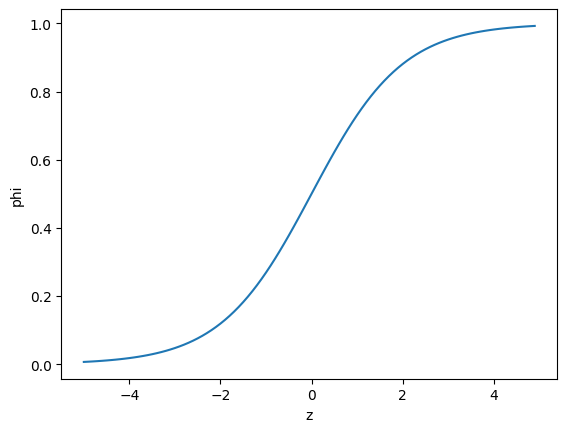

In [23]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1) # -5 ~ 5를 0.1간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) #np.exp()로 시그모이드 함수실행

plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

## 불리언 인덱싱

- 2진분류
- numpy 배열을 True, False값을 전달하여 행을 선택

In [25]:
import numpy as np

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])
#결론 : True값만 출력

['A' 'C']


In [28]:
# 훈련세트에서 도미(Bream)와 빙어(Smelt)의 행만 분류
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

# bream_smelt_indexes에 도미와 빙어가 있을 경우 True, 나머지 False
# train_scaled, train_target 배열에 인덱싱을 적용하면, 도미, 빙어 데이터만 골라낼수 있음
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# print(train_bream_smelt.shape)
#도미(Bream) : 총데이터 35개 = 33(훈련)

## 훈련

In [29]:
# 성형모델에 로지스틱 회귀 클래스 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt) #2진분류로 나옴

LogisticRegression()

## 결론

In [30]:
# 처음 5개의 값
print(lr.predict(train_bream_smelt[:5]))

# 도미(Bream) 4개, 빙어(Smelt) 1개

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


### .predict_proba

- 확률확인

In [31]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


샘플마다 2개씩 확률 출력
 - 첫번째 열 : 0(음성)에 대한 확률 => Bream(도미)
 - 두번째 열 : 1(양성)에 대한 확률 => Smelt(빙어)

확률을 비교하여 높은 값으로 분류

만약 Bream(도미)를 양성 클래스로 사용하고 싶으면 전처리에서 Bream의 target값을 1로 만들면 됌

In [32]:
#sklearn의 target 값은 알파벳 순으로 정렬해서 사용
print(lr.classes_)

['Bream' 'Smelt']


## 선형방정식

z = -0.40451732 * (Weight) + 0.57582787  * (Length) -0.66248158 * (Diagonal) -1.01329614 * (Height) -0.73123131 * (Width) -2.16172774

### .coef_ & .intercept_
- 로지스틱 회귀로 학습한 계수(중요도)

In [34]:
print("중요도 : ",lr.coef_," 절편 : ", lr.intercept_)

중요도 :  [[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]]  절편 :  [-2.16172774]


### .decision_function()
- z값 계산

In [36]:
# z값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print("z = ", decisions)

z =  [-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


## 확률계산(scipy)

In [39]:
# scipy 라이브러리에도 시그모이드 함수존재 -> expit()
from scipy.special import expit

print(expit(decisions)) # g(z) = 1 / (1 + np.exp(-z))
#여기까지가 2개의 물고기 분류하는 방법
#     도미        빙어      도미       도미       도미
# [0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


## 규제

- 기본적으로 반복적인 알고리즘을 사용
- L2 규제 : 기본적으로 릿지 회귀와 같은 계수를 제곱을 규제
- max_iter : 최대 반복횟수(정확도를 위함)
    - 기본값 : 100
    - ConvergenceWarning : 지정한 반복횟수가 부족하면 경고가뜸
- alpha 매개변수 : 릿지회귀에서 규제의 양 조절
    - alpha와 규제 비례관계
- C(대문자) : 규제제어 매개변수
    - 기본값 : 1
    - C와 규제 반비례관계

## 재훈련(다중분류이용)

In [41]:
# 반복횟수 부족 : max_iter = 1000으로 변경
# 규제완화 : C = 20변경

lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)

print("train : ", lr.score(train_scaled, train_target))
print("test  : ", lr.score(test_scaled, test_target))
# train(0.932) > test(0.925) : 과소나 과대적합은 아님

train :  0.9327731092436975
test  :  0.925


In [42]:
#결과 다중분류로 나옴
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [43]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [45]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


```
'Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'
[[0.     0.014   0.842    0.     0.135   0.007    0.003]
 [0.     0.003   0.044    0.     0.007   0.946    0.   ]
 [0.     0.      0.034    0.934  0.015   0.016    0.   ]
 [0.011  0.034   0.305    0.006  0.567   0.       0.076]
 [0.     0.      0.904    0.002  0.089   0.002    0.001]]
```

In [47]:
#다중분류일때 선형방정식
print("중요도 : ",lr.coef_.shape," 절편 : ", lr.intercept_.shape)
# (7, 5) : 7개의 행, 5개의 특성
# (7,) : 이진분류에서 보았던 z을 7개를 계산
#결론 : 가장 높은 z값을 출력하는 클래스가 예측 클래스로 사용

중요도 :  (7, 5)  절편 :  (7,)


### 소프트맥스 게산법

- 확률출력
    - 2진분류 : 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환
    - 다중분류 : 소프트맥스 함수를 사용하여 7개의 z값을 확률로 변환

<img src = "https://miro.medium.com/v2/resize:fit:1400/0*tGSrq3hfKFBgKntB" width = 450px>

In [48]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~z7의 값\n")
for idx, z in enumerate(decision):
    print(f"{idx}번째 샘플의 z값 \n{z}\n")

5개 샘플에 대한 z1 ~z7의 값

0번째 샘플의 z값 
[-6.50722814  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625859
 -0.62549704]

1번째 샘플의 z값 
[-10.87900747   1.94410609   4.77600607  -2.42306183   2.98748716
   7.84171377  -4.24724379]

2번째 샘플의 z값 
[-4.33809959 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431898
 -3.87182371]

3번째 샘플의 z값 
[-0.69143994  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143404
  1.25700485]

4번째 샘플의 z값 
[-6.40138612 -1.99137623  5.81526372 -0.134644    3.49905134 -0.08753485
 -0.69937385]



### scipy

In [52]:
from scipy.special import softmax

print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측결과"]
prd = lr.predict(test_scaled[:5].reshape(5, -1))
sm = softmax(decision, axis = 1).round(2) * 100
con = np.column_stack((sm, prd))
print(pd.DataFrame(con, columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish   예측결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
